# Guided Projects Artificial Intelligence & Machine Learning
## Guided Projects: Unsupervised Learning
### Adaptive Thresholding: Edge Detection in Images 
Edges define the boundaries between different regions in an image, which helps in matching 
the pattern, segment, and recognize an object. In simple thresholding, the threshold value is 
global, which is prone to fail in many cases. Adaptive thresholding is a modified method where 
the threshold value is calculated for each pixel based on a smaller region around it. Therefore, 
there will be different threshold values for different regions which gives better results for images 
with varying illumination.
### Question:
Using OpenCV, first convert any image with varying High condition to a grayscale image. Now 
implement edge detection first using the canny edge detection. Then apply simple 
thresholding and also Adaptive/OTSU thresholding using OpenCV to see the working of 
each of these methods. Once you obtain good results, use the obtained edge detection result 
as a mask to give color to all the edges (if edges use the color from the original image, else 
leave it black only).

In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read color Image
img = cv2.imread("Image.jpg")

In [3]:
# Attributes of img
#print(img)
print(type(img))
print(img.shape)
print(img[0,:10])

<class 'numpy.ndarray'>
(800, 800, 3)
[[244 249 248]
 [242 247 246]
 [241 246 245]
 [242 247 246]
 [244 249 248]
 [247 249 250]
 [246 248 249]
 [244 246 247]
 [245 247 248]
 [244 246 247]]


In [4]:
# Read grayscale Image
img_gray = cv2.imread("Image.jpg", 0)

In [5]:
# Attributes of grayscale img
print(type(img_gray))
print(img_gray.shape)
print(img_gray[0,:10])

<class 'numpy.ndarray'>
(800, 800)
[248 246 245 246 248 249 248 246 247 246]


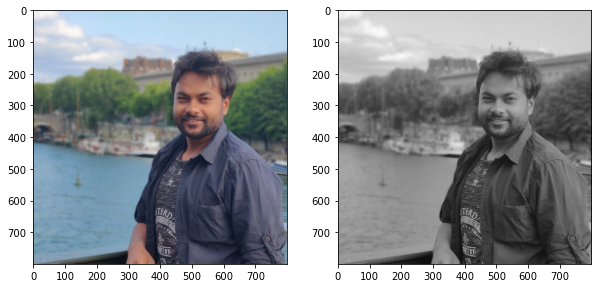

In [6]:
# Show Image
%matplotlib inline
fig, ax = plt.subplots(ncols = 2, figsize = (10,15))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
ax[1].imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB));

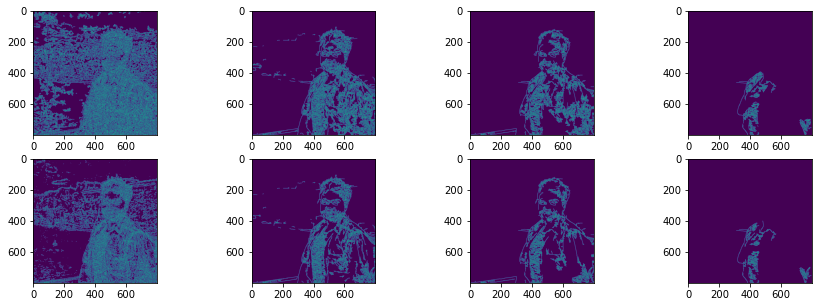

In [7]:
# Edge detection using Canny
minval = [1, 25]
maxval = [30, 100, 200, 500]
fig, ax = plt.subplots(ncols = len(maxval), nrows = len(minval), figsize = (15, 5))
for n, i in enumerate(minval):
    for m, j in enumerate(maxval):
        edge = cv2.Canny(img_gray, i, j)
        ax[n,m].imshow(edge);

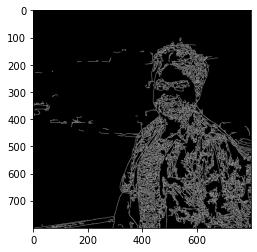

In [8]:
edge_fin = cv2.cvtColor(cv2.Canny(img_gray, 10, 100), cv2.COLOR_BGR2RGB)
plt.imshow(edge_fin);

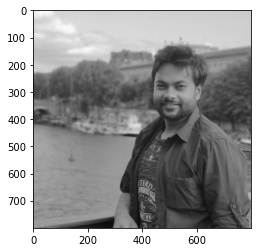

In [9]:
img_gray1 = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
plt.imshow(img_gray1);

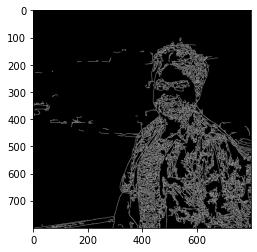

In [11]:
# Simple Thresholding
ret, thres = cv2.threshold(edge_fin, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thres);

In [12]:
edge_a = edge_fin[:,:,1]
edge_a.shape

(800, 800)

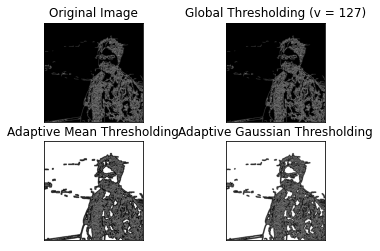

In [13]:
# Adaptive thresholding
ret,th1 = cv2.threshold(edge_a,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(edge_a,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(edge_a,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [edge_a, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

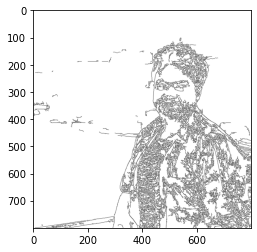

In [14]:
# OTSU's Thresholding
ret1, thresh1 = cv2.threshold(edge_a, 120, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(cv2.cvtColor(thresh1, cv2.COLOR_BGR2RGB));